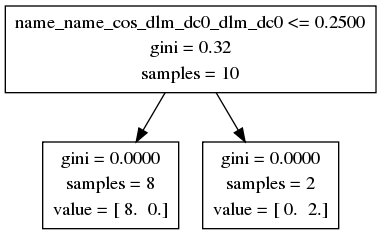

In [3]:
from IPython.display import Image
Image(filename='../testcases/dt_.png') 